# Sentiment Analysis - External Exploration

### Import required libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import data

In [4]:
spotify_sent_df = pd.read_excel("spotify_sent.xlsx")
word_count_df = pd.read_excel("word_count_data.xlsx")

## Create a visual for most frequent words

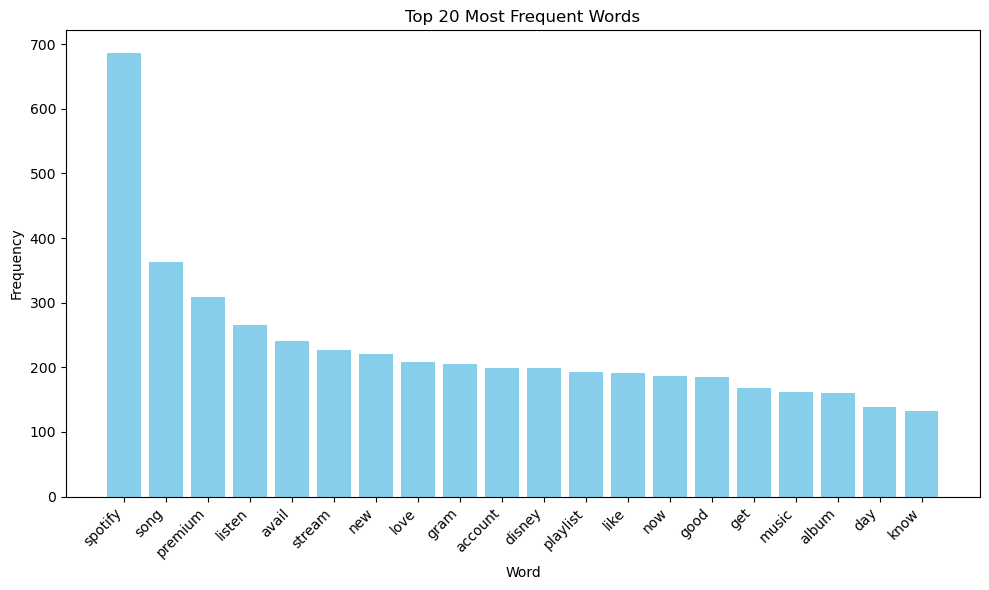

In [5]:
top_n = 20  
top_words = word_count_df.nlargest(top_n, 'n')
plt.figure(figsize=(10, 6))
plt.bar(top_words['word'], top_words['n'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Clean spotify_sent_df 

## Delete unwanted columns

In [6]:
columns_to_delete = ['user_id', 'screen_name','reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name', 'is_quote','is_retweet','quote_count', 'reply_count', 'hashtags', 'symbols', 'urls_url', 'urls_t.co', 'urls_expanded_url', 'media_url', 'media_t.co', 'media_expanded_url', 'media_type', 'ext_media_url', 'ext_media_t.co', 'ext_media_expanded_url', 'ext_media_type', 'mentions_user_id', 'mentions_screen_name', 'lang', 'quoted_status_id', 'quoted_text', 'quoted_created_at', 'quoted_source', 'quoted_favorite_count', 'quoted_retweet_count', 'quoted_user_id', 'quoted_screen_name', 'quoted_name', 'quoted_followers_count', 'quoted_friends_count', 'quoted_statuses_count', 'quoted_location', 'quoted_description', 'quoted_verified', 'retweet_status_id', 'retweet_text', 'retweet_created_at', 'retweet_source', 'retweet_favorite_count', 'retweet_retweet_count', 'retweet_user_id', 'retweet_screen_name', 'retweet_name', 'retweet_followers_count', 'retweet_friends_count', 'retweet_statuses_count', 'retweet_location', 'retweet_description', 'retweet_verified', 'place_url', 'place_name', 'place_full_name', 'place_type', 'country', 'country_code', 'geo_coords', 'coords_coords', 'bbox_coords', 'status_url', 'name', 'location', 'description', 'url', 'protected', 'followers_count', 'friends_count', 'listed_count', 'statuses_count', 'favourites_count', 'account_created_at','profile_url', 'profile_expanded_url', 'account_lang', 'profile_banner_url', 'profile_background_url', 'profile_image_url']
spotify_sent_df.drop(columns=columns_to_delete, inplace=True)

In [7]:
print(spotify_sent_df.columns.tolist())

['status_id', 'created_at', 'text', 'source', 'display_text_width', 'favorite_count', 'retweet_count', 'verified', 'spotify_sent_syuzhet', 'spotify_sent_afinn', 'spotify_sent_nrc', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust', 'negative', 'positive']


# Data Exploration 

## Time Series Analysis


Since we have a created_at column with datetime values, we can perform time series analysis to understand the overall trend of tweet acivity over time.

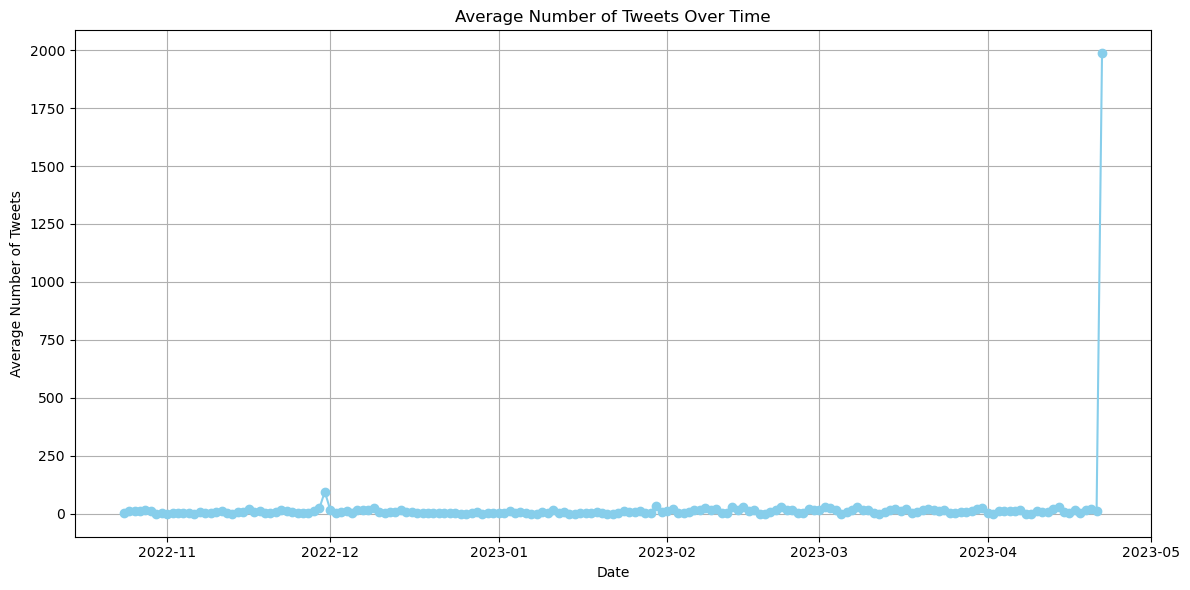

In [22]:
average_tweets_over_time = spotify_sent_df.groupby(pd.Grouper(key='created_at', freq='D')).size().mean()

plt.figure(figsize=(12, 6))
plt.plot(spotify_sent_df.groupby(pd.Grouper(key='created_at', freq='D')).size().index, 
         spotify_sent_df.groupby(pd.Grouper(key='created_at', freq='D')).size().values,
         marker='o', color='skyblue')
plt.xlabel('Date')
plt.ylabel('Average Number of Tweets')
plt.title('Average Number of Tweets Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


## Correlation Analysis

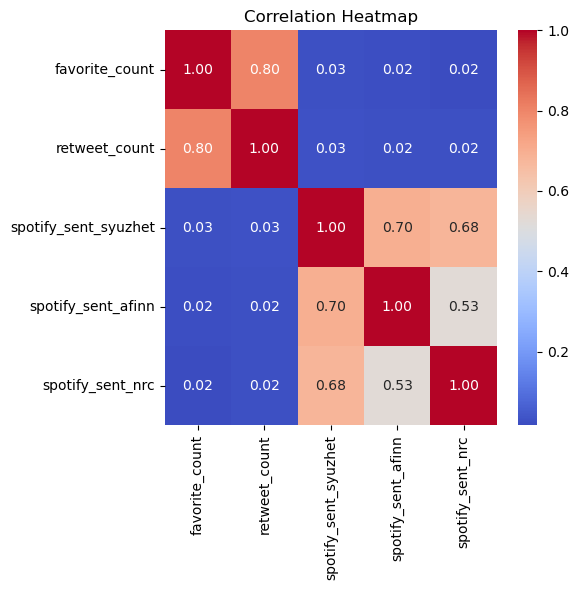

In [27]:
plt.figure(figsize=(6, 6))
sns.heatmap(spotify_sent_df[['favorite_count', 'retweet_count', 'spotify_sent_syuzhet', 'spotify_sent_afinn', 'spotify_sent_nrc']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


## Distribution Analysis

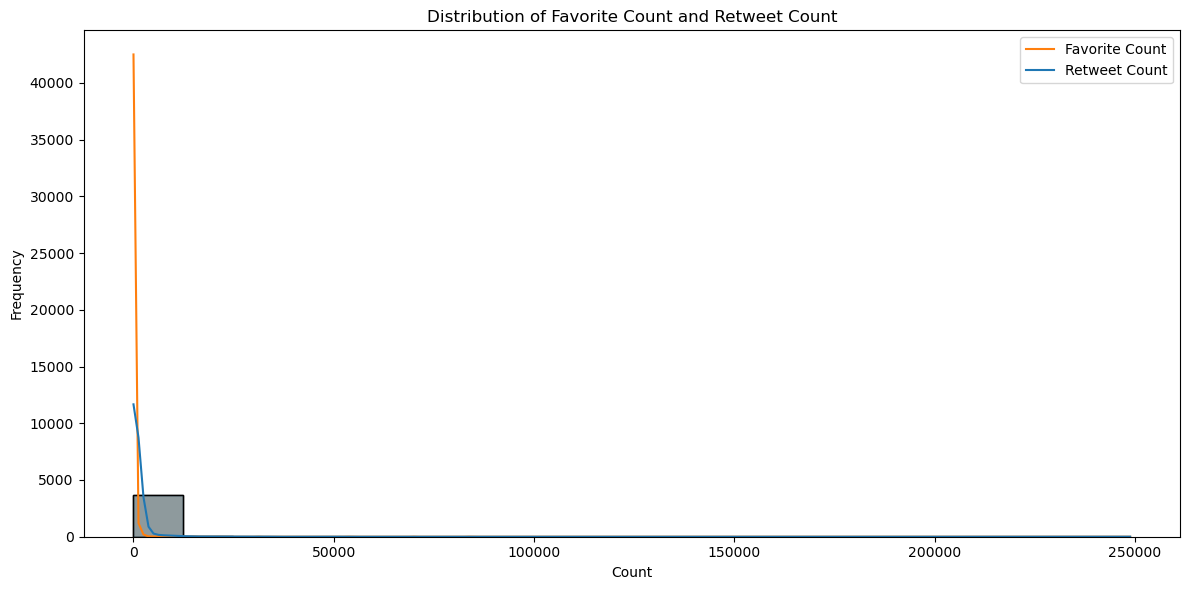

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(data=spotify_sent_df[['favorite_count', 'retweet_count']], bins=20, kde=True)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Favorite Count and Retweet Count')
plt.legend(['Favorite Count', 'Retweet Count'])
plt.tight_layout()
plt.show()


## Source Analysis

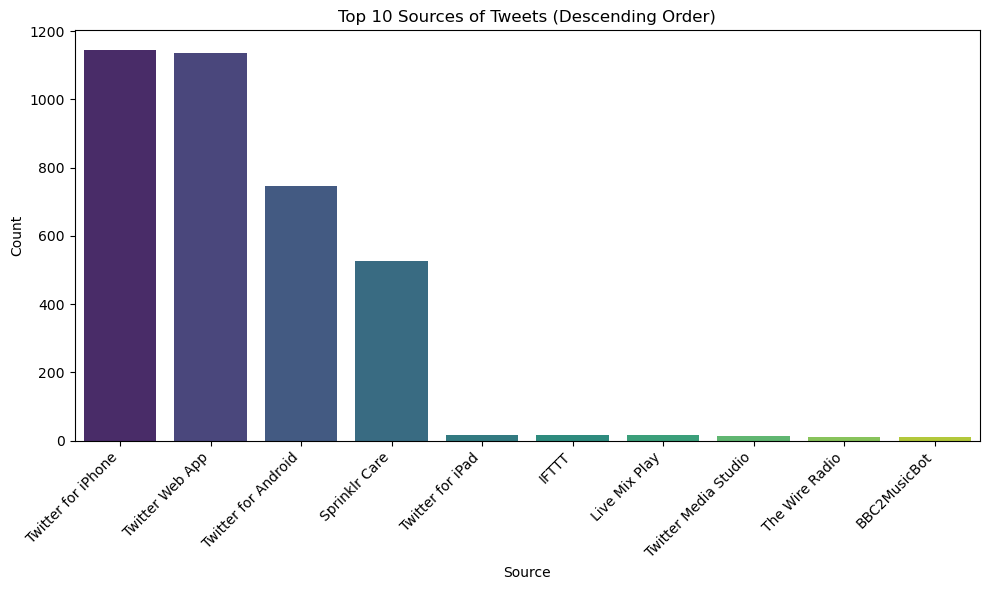

In [33]:
source_counts = spotify_sent_df['source'].value_counts()
top_sources = source_counts.head(10)
top_sources = top_sources.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_sources.index, y=top_sources.values, palette='viridis')
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Top 10 Sources of Tweets (Descending Order)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Verified Account Analysis

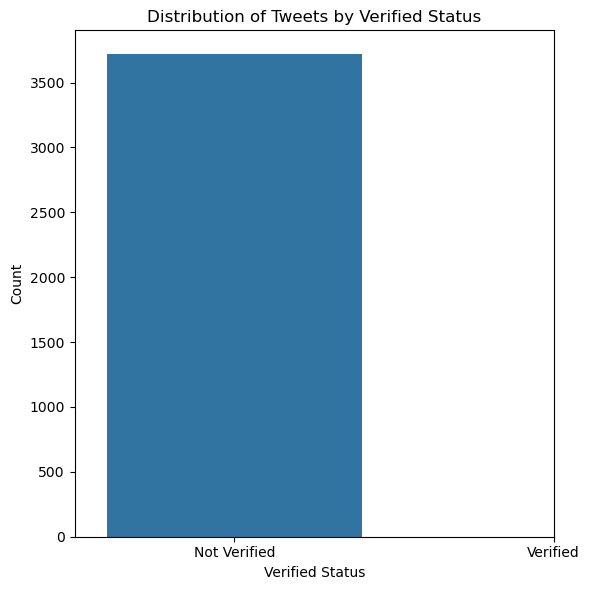

In [36]:
plt.figure(figsize=(6,6))
sns.countplot(x='verified', data=spotify_sent_df)
plt.xlabel('Verified Status')
plt.ylabel('Count')
plt.title('Distribution of Tweets by Verified Status')
plt.xticks(ticks=[0, 1], labels=['Not Verified', 'Verified'])
plt.tight_layout()
plt.show()

## Emotion Analysis

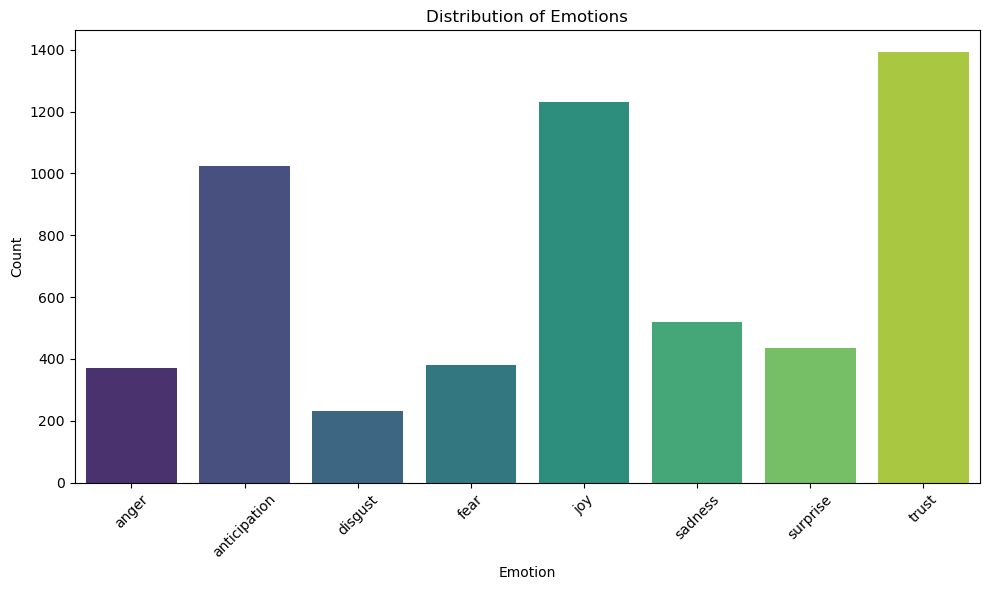

In [39]:
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

emotion_counts = spotify_sent_df[emotions].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Sentiment Comparative Analysis

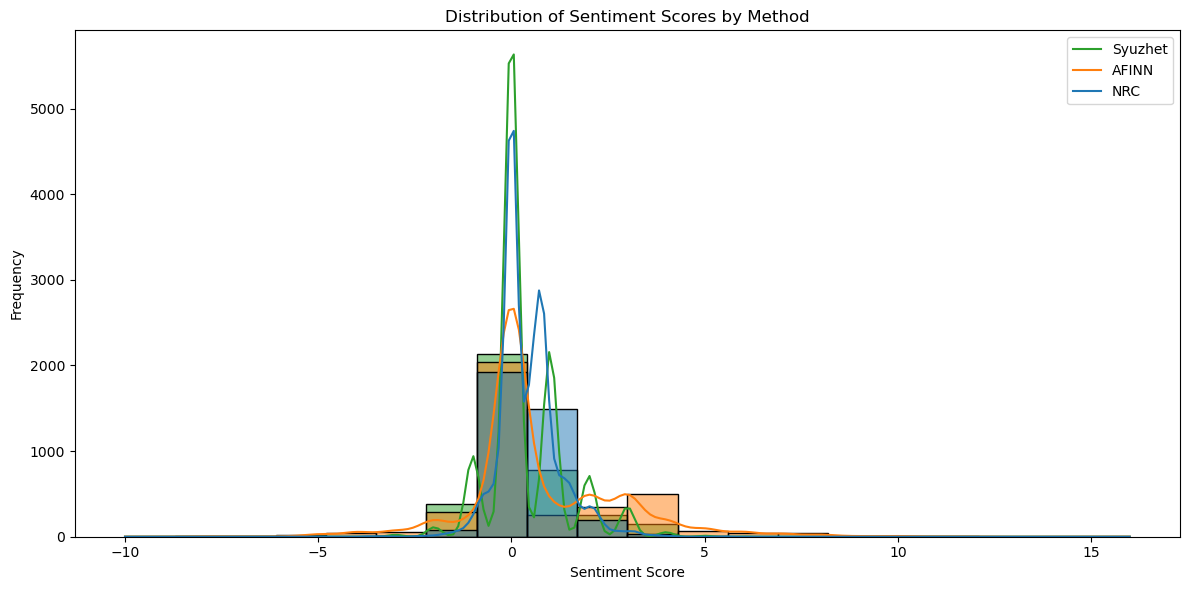

In [58]:
plt.figure(figsize=(12, 6))
sns.histplot(data=spotify_sent_df[['spotify_sent_syuzhet', 'spotify_sent_afinn', 'spotify_sent_nrc']], bins=20, kde=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores by Method')
plt.legend(['Syuzhet', 'AFINN', 'NRC'])
plt.tight_layout()
plt.show()

Proportion of tweets in each sentiment category for Syuzhet method:
Positive    0.521119
Neutral     0.352704
Negative    0.126177
Name: sentiment_syuzhet, dtype: float64

Proportion of tweets in each sentiment category for AFINN method:
Neutral     0.548561
Positive    0.340597
Negative    0.110842
Name: sentiment_afinn, dtype: float64

Proportion of tweets in each sentiment category for NRC method:
Neutral     0.575195
Positive    0.320420
Negative    0.104385
Name: sentiment_nrc, dtype: float64


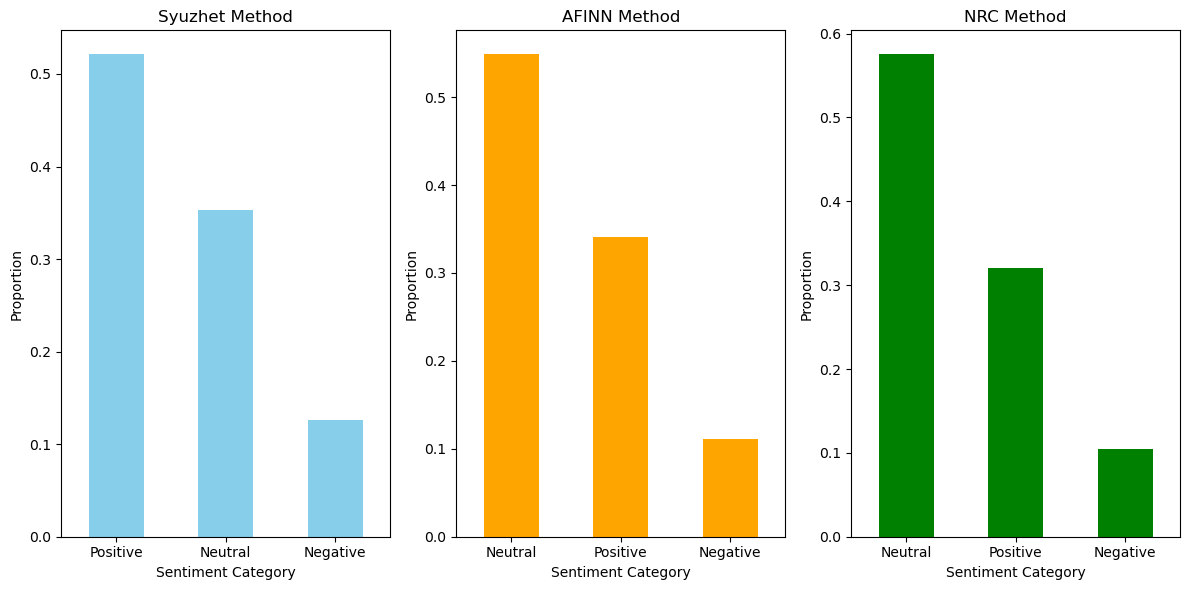


Mean sentiment score for Syuzhet method: 0.42249125638955864
Mean sentiment score for AFINN method: 0.7344632768361582
Mean sentiment score for NRC method: 0.3588915792305623


In [59]:
negative_threshold = 0
positive_threshold = 0
def categorize_sentiment(score):
    if score < negative_threshold:
        return 'Negative'
    elif score > positive_threshold:
        return 'Positive'
    else:
        return 'Neutral'


spotify_sent_df['sentiment_syuzhet'] = spotify_sent_df['spotify_sent_syuzhet'].apply(categorize_sentiment)
spotify_sent_df['sentiment_afinn'] = spotify_sent_df['spotify_sent_afinn'].apply(categorize_sentiment)
spotify_sent_df['sentiment_nrc'] = spotify_sent_df['spotify_sent_nrc'].apply(categorize_sentiment)


sentiment_counts_syuzhet = spotify_sent_df['sentiment_syuzhet'].value_counts(normalize=True)
sentiment_counts_afinn = spotify_sent_df['sentiment_afinn'].value_counts(normalize=True)
sentiment_counts_nrc = spotify_sent_df['sentiment_nrc'].value_counts(normalize=True)

print("Proportion of tweets in each sentiment category for Syuzhet method:")
print(sentiment_counts_syuzhet)
print("\nProportion of tweets in each sentiment category for AFINN method:")
print(sentiment_counts_afinn)
print("\nProportion of tweets in each sentiment category for NRC method:")
print(sentiment_counts_nrc)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sentiment_counts_syuzhet.plot(kind='bar', color='skyblue')
plt.title('Syuzhet Method')
plt.xlabel('Sentiment Category')
plt.ylabel('Proportion')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
sentiment_counts_afinn.plot(kind='bar', color='orange')
plt.title('AFINN Method')
plt.xlabel('Sentiment Category')
plt.ylabel('Proportion')
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
sentiment_counts_nrc.plot(kind='bar', color='green')
plt.title('NRC Method')
plt.xlabel('Sentiment Category')
plt.ylabel('Proportion')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

mean_sentiment_syuzhet = spotify_sent_df['spotify_sent_syuzhet'].mean()
mean_sentiment_afinn = spotify_sent_df['spotify_sent_afinn'].mean()
mean_sentiment_nrc = spotify_sent_df['spotify_sent_nrc'].mean()

print("\nMean sentiment score for Syuzhet method:", mean_sentiment_syuzhet)
print("Mean sentiment score for AFINN method:", mean_sentiment_afinn)
print("Mean sentiment score for NRC method:", mean_sentiment_nrc)


## User Engagement Analysis

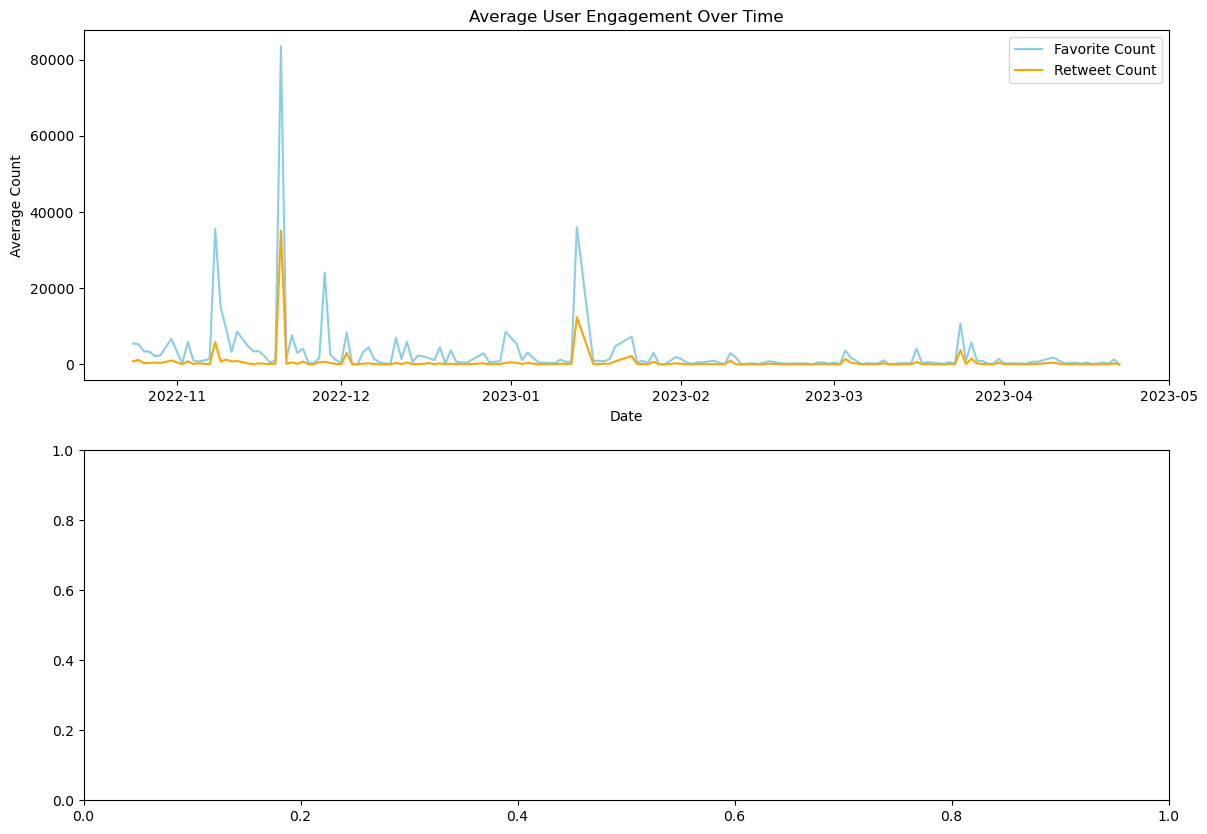

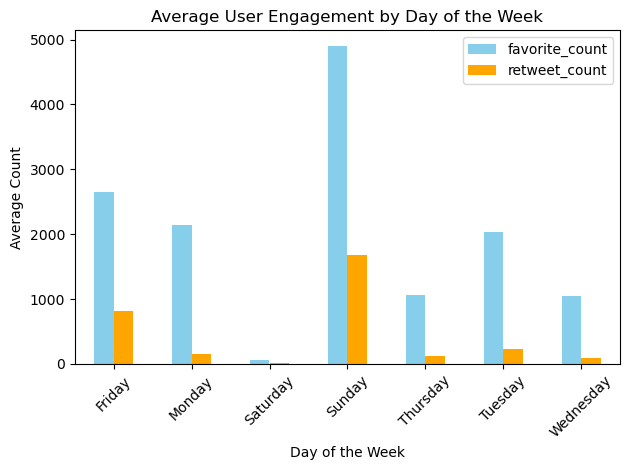

In [62]:

spotify_sent_df['date'] = spotify_sent_df['created_at'].dt.date
engagement_by_date = spotify_sent_df.groupby('date')[['favorite_count', 'retweet_count']].mean()

spotify_sent_df['day_of_week'] = spotify_sent_df['created_at'].dt.day_name()
engagement_by_day = spotify_sent_df.groupby('day_of_week')[['favorite_count', 'retweet_count']].mean()

plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)  
engagement_by_date['favorite_count'].plot(color='skyblue', label='Favorite Count')
engagement_by_date['retweet_count'].plot(color='orange', label='Retweet Count')
plt.title('Average User Engagement Over Time')
plt.xlabel('Date')
plt.ylabel('Average Count')
plt.legend()

plt.subplot(2, 1, 2)  
engagement_by_day[['favorite_count', 'retweet_count']].plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average User Engagement by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Statistical Modeling

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = spotify_sent_df[['favorite_count', 'verified', 'spotify_sent_syuzhet', 'spotify_sent_afinn', 'spotify_sent_nrc', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust', 'negative', 'positive']]
y = spotify_sent_df['retweet_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


new_data = pd.DataFrame({'favorite_count': [100], 'verified': [True], 'spotify_sent_syuzhet': [0.5], 'spotify_sent_afinn': [1], 'spotify_sent_nrc': [2], 'anger': [0], 'anticipation': [1], 'disgust': [0], 'fear': [0], 'joy': [1], 'sadness': [0], 'surprise': [1], 'trust': [1], 'negative': [-1], 'positive': [1]})
predicted_retweets = model.predict(new_data)
print("Predicted retweets:", predicted_retweets)


Mean Squared Error: 7016059.853007733
R-squared: -45.604030577509604
Predicted retweets: [-110.46484116]
